<a href="https://colab.research.google.com/github/KomalMano/Story/blob/master/4_Normal_Distribution_and_Z_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
from google.colab import files
import numpy as np
import seaborn as sn
import io

In [18]:
uploaded = files.upload()

Saving weight-height.csv to weight-height (2).csv


In [20]:

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "weight-height.csv" with length 188910 bytes


In [21]:
uploaded

{'weight-height.csv': b'gender,height\r\nMale,73.84701702\r\nMale,68.78190405\r\nMale,74.11010539\r\nMale,71.7309784\r\nMale,69.88179586\r\nMale,67.25301569\r\nMale,68.78508125\r\nMale,68.34851551\r\nMale,67.01894966\r\nMale,63.45649398\r\nMale,71.19538228\r\nMale,71.64080512\r\nMale,64.76632913\r\nMale,69.2830701\r\nMale,69.24373223\r\nMale,67.6456197\r\nMale,72.41831663\r\nMale,63.97432572\r\nMale,69.6400599\r\nMale,67.93600485\r\nMale,67.91505019\r\nMale,69.43943987\r\nMale,66.14913196\r\nMale,75.20597361\r\nMale,67.89319634\r\nMale,68.1440328\r\nMale,69.08963143\r\nMale,72.80084352\r\nMale,67.42124228\r\nMale,68.49641536\r\nMale,68.61811055\r\nMale,74.03380762\r\nMale,71.52821604\r\nMale,69.1801611\r\nMale,69.57720237\r\nMale,70.40092889\r\nMale,69.07617117\r\nMale,67.19352328\r\nMale,65.80731565\r\nMale,64.30418789\r\nMale,67.97433623\r\nMale,72.18942596\r\nMale,65.27034552\r\nMale,66.09017738\r\nMale,67.51032152\r\nMale,70.10478626\r\nMale,68.25183644\r\nMale,72.17270912\r\nMale,

In [22]:
df = pd.read_csv(io.StringIO(uploaded['weight-height.csv'].decode('utf-8')))
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [23]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

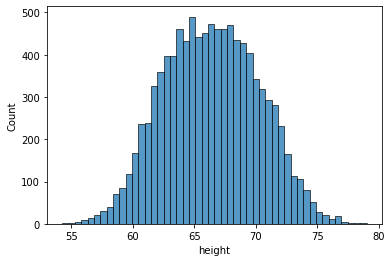

In [26]:
sn.histplot(df.height, kde=False)

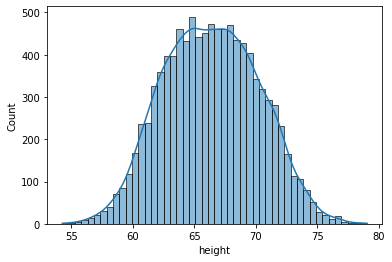

In [27]:
sn.histplot(df.height, kde=True)

In [28]:
mean = df.height.mean()
mean

66.3675597548656

In [29]:
std_deviation = df.height.std()
std_deviation

3.847528120795573

In [30]:
mean - 3*std_deviation

54.824975392478876

In [31]:
mean + 3*std_deviation

77.91014411725232

In [32]:
df [df.height < 54.82 ]

,gender,height
6624,Female,54.616858
9285,Female,54.263133


In [33]:
df [df.height > 77.91 ]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374


In [34]:
df [(df.height > 77.91) | (df.height < 54.82) ]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [38]:
#now here is reverse condition
df_no_outlier = df [(df.height < 77.91) & (df.height > 54.82) ]
df_no_outlier.shape

(9993, 2)

In [39]:
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [40]:
df['zscore'] = (df.height-df.height.mean())/df.height.std()
df.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [41]:
df.height.mean()

66.3675597548656

In [42]:
df.height.std()

3.847528120795573

In [44]:
(73.847017 - 66.3675597548656) / 3.847528120795573

1.943964283122077

In [45]:
df[df.zscore>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [47]:
df[df.zscore<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [48]:
df[(df.zscore<-3) | (df.zscore>3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [51]:
df_no_outlier = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outlier.shape

(9993, 3)